<h1>卒論進捗報告</h1>
11月16日

## ルーラー

コインを１列に並べて遊ぶゲーム

## 後続局面を表す隣接行列

<ul>
<li>局面$P$が局面$Q$に一手で移行可能な場合、隣接行列の$PQ$成分は$1$</li>
<li>ゲームで使用するコインの枚数を$k$とする</li>
<ul>
<li>隣接行列の大きさは$2^{k} \times 2^{k}$</li>
<li>行列のインデックス$i\ (0 \leq i \leq 2^{k} - 1)$</li>
</ul>
</ul>

In [13]:
# -*- coding: utf-8 -*-
%matplotlib notebook
import numpy as np
from scipy import io, sparse
from matplotlib import pyplot as plt

k=7
size=2**k
T=sparse.lil_matrix((size,size))

def rec1(a,r):
    if r<1: return
    one(T,a,r)
    s=int(r/2)
    rec1([a[0]-s,a[1]],s)
    rec1([a[0]+s,a[1]+r],s)
    rec2([a[0]+s,a[1]],s)
    rec2([a[0],a[1]+s],s)

def rec2(a,r):
    if r<1: return
    one(T,a,r)
    s=int(r/2)
    rec2([a[0]+s,a[1]],s)
    rec2([a[0],a[1]+s],s)

def one(m,a,r):
    (x,y)=(a[0],a[1])
    for i in range(r):
         m[x+i,y+i]=True
            
def viz(data):
    plt.imshow(data,'YlOrRd', aspect="auto", interpolation = "none")
    plt.colorbar()
    plt.show()
    #plt.savefig("rulermatrix.png")
    
def Mpro(x):
    cT=T.tocsr()
    cTx=cT
    for i in range(x-1):
        cTx=cTx.dot(cT)
    viz(cTx.todense())
            
def main():
    t=int(size/2)
    rec1([t,0],t)
    viz(T.todense())
    #Mpro(3)

## 隣接行列 $(k = 7)$

<IPython.core.display.Javascript object>


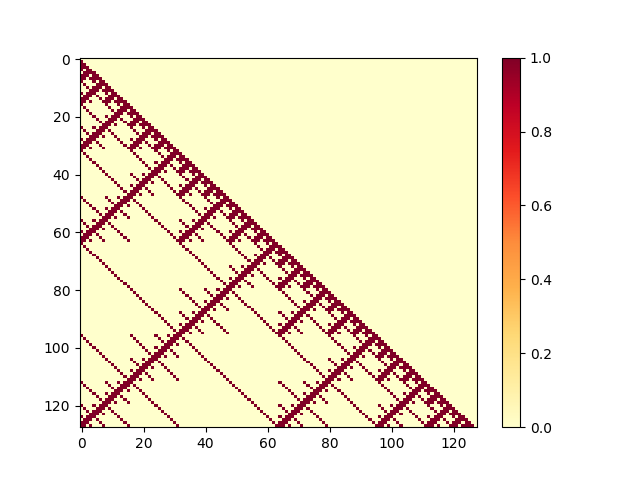

In [15]:
main()

## 隣接行列の再帰的定義

コインが$k$枚のときの隣接行列を$A_{k}$とし、$r = 2^{k-1}$とおく$(k \geq 2)$
$$
A_{k} = \left\{ \begin{array}{ll}
a_{k\ i\ j} = a_{k-1\ i\ j} & (0 \leq i, j \leq r - 1), \\
a_{i+r\ j+r} = a_{i\ j} & (0 \leq i, j \leq r - 1), \\
a_{i+r\ j} = a_{i\ j} & (\frac{r}{2} \leq i, \leq r - 1, 0 \leq  j \leq \frac{r}{2} - 1), \\
a_{i+\frac{r}{2}\ j+\frac{r}{2}} = a_{i\ j} & (\frac{r}{2} \leq i, \leq r - 1, 0 \leq  j \leq \frac{r}{2} - 1), \\
a_{i+r\ i} = 1 & (0 \leq i \leq r-1)
\end{array} \right.
$$

$k = 1$のときは$A_{1} =\left(
    \begin{array}{cc}
      0 & 0 \\
      1 & 0
    \end{array}
  \right)$
